# Downloading dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
# Importing the helper_functions file
import os

if not os.path.exists('helper_functions.py'):
  !wget https://raw.githubusercontent.com/DavAll22/Extra-Code/main/helper_functions_TF.py
else:
  print("[INFO] 'helper_functions_TF.py' already exists, skipping download.")

--2023-06-02 12:26:17--  https://raw.githubusercontent.com/DavAll22/Machine-Learning/main/extra-code/helper_functions_TF.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12745 (12K) [text/plain]
Saving to: ‘helper_functions_TF.py’

helper_functions_TF 100%[===================>]  12.45K  --.-KB/s    in 0s      

2023-06-02 12:26:17 (80.5 MB/s) - ‘helper_functions_TF.py’ saved [12745/12745]



# Dataset visualisation & preprocessing

In [3]:
# Show first training sample
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# Check the shape of the data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
# Getting the shape of 1 sample image
train_data[0].shape, train_labels[0].shape

((28, 28), ())

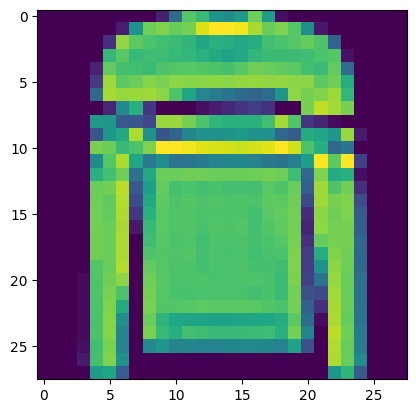

In [6]:
# Visualising the sample
import matplotlib.pyplot as plt
plt.imshow(train_data[5])

In [7]:
# Creating the class names for the labels
class_names = ['T-Shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

len(class_names)

10

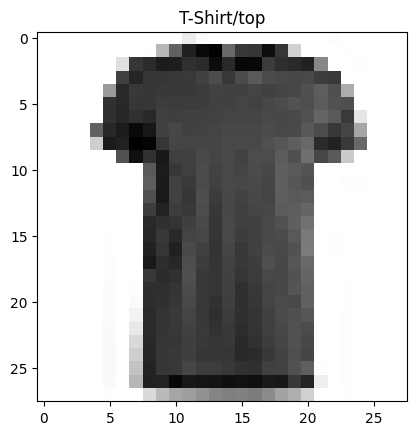

In [8]:
# Plot image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change colour to greyscale
plt.title(class_names[train_labels[17]]);

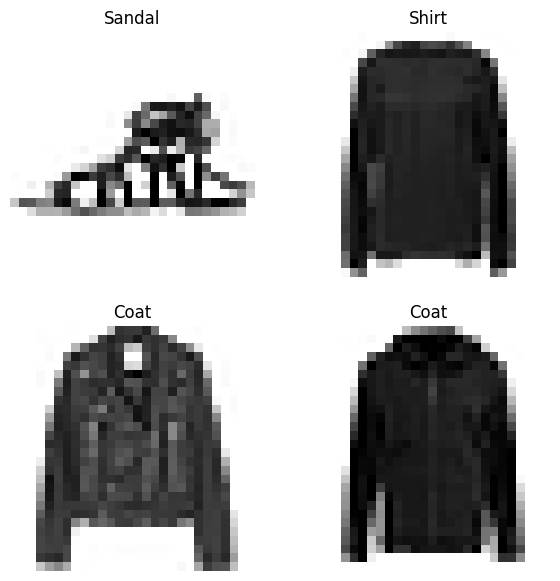

In [9]:
# Plot multiple random images in the dataset
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Normalising the data

In [10]:
train_data, test_data = train_data/255.0, test_data/255.0

# Building the model

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create model
from tensorflow.keras import layers

model_1 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Flatten(), # flattens output of final conv layer to be suited for fully connected layer
    layers.Dense(10, activation='softmax')
])

# Compile model
model_1.compile(loss='sparse_categorical_crossentropy', # if labels are not one-hot encoded, use sparse
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Create Learning Rate Callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit model
print('Training model...')
model_1_history = model_1.fit(x=train_data,
                  y=train_labels,
                  epochs=50,
                  validation_data=(test_data, test_labels),
                  callbacks=[lr_scheduler])

Training model...
Epoch 1/50
1875/1875 [==============================] - 17s 4ms/step - loss: 0.9099 - accuracy: 0.6895 - val_loss: 0.6300 - val_accuracy: 0.7680 - lr: 1.0000e-04
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5580 - accuracy: 0.7939 - val_loss: 0.5622 - val_accuracy: 0.7963 - lr: 1.1220e-04
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4928 - accuracy: 0.8194 - val_loss: 0.5024 - val_accuracy: 0.8168 - lr: 1.2589e-04
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4548 - accuracy: 0.8354 - val_loss: 0.4573 - val_accuracy: 0.8365 - lr: 1.4125e-04
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4288 - accuracy: 0.8472 - val_loss: 0.4429 - val_accuracy: 0.8408 - lr: 1.5849e-04
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4053 - accuracy: 0.8546 - val_loss: 0.4251 - val_accuracy: 0.8495 - lr: 1.7783e-04
Epoch 7/50
1875

In [12]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          9

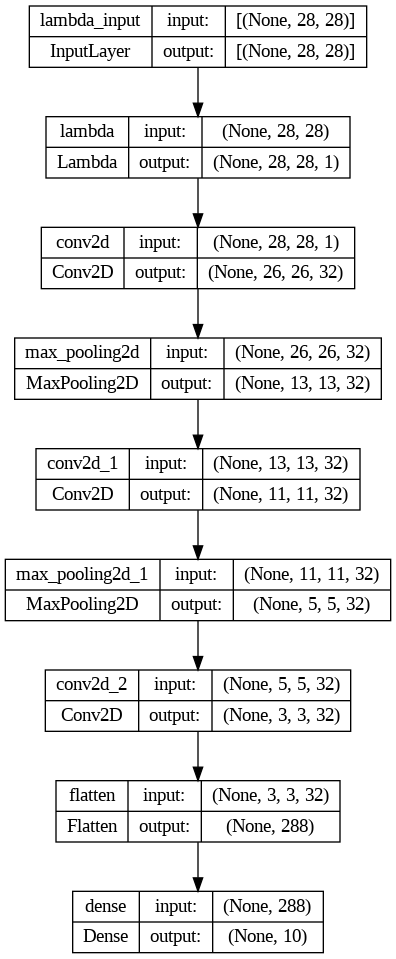

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes=True)

# Evaluate model

In [14]:
model_1.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5518 - accuracy: 0.7956


[0.5518175959587097, 0.7955999970436096]

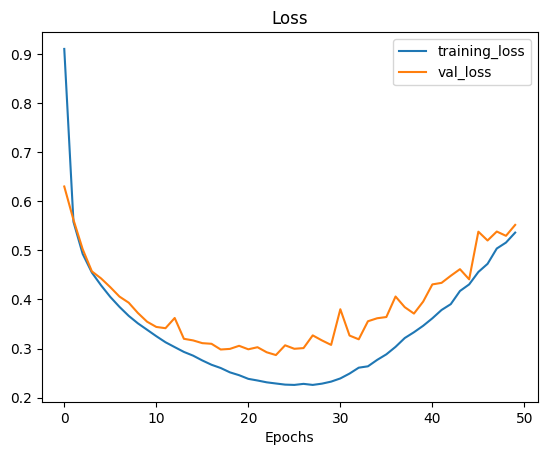

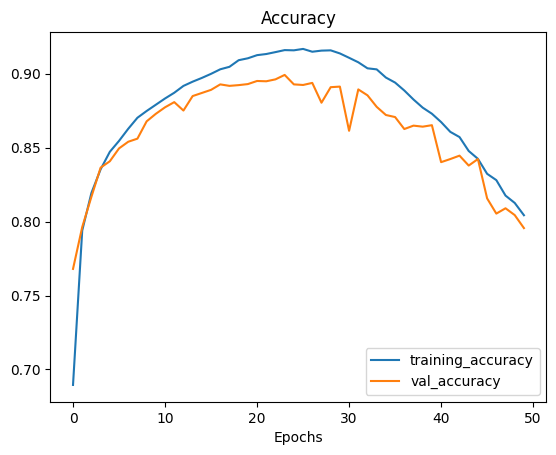

In [15]:
# Getting loss curves
from helper_functions_TF import plot_loss_curves

plot_loss_curves(model_1_history)

Evident of overfitting after epoch 25 (drop off in accuracy, loss increases), so will use 25 epochs in training.

## Learning rate scheduling

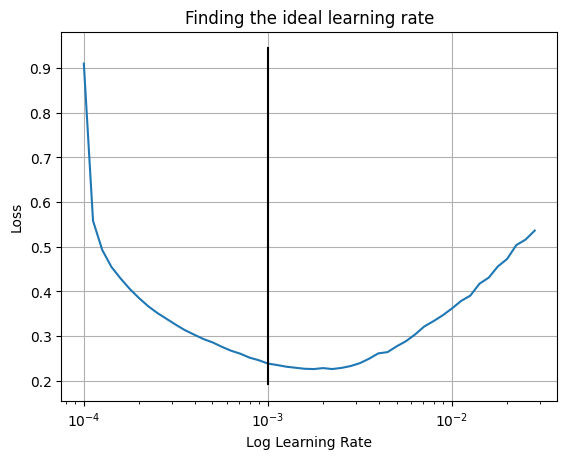

In [16]:
# Plot learning rate decay
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-4 * (10**(np.arange(50)/20))
plt.semilogx(lrs, model_1_history.history['loss'])
plt.plot([1e-3, 1e-3], plt.ylim(), 'k-')
plt.xlabel('Log Learning Rate')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')
plt.grid(True)

Learning rate of around 1e-3 seems to be ideal (Loss still decreases but hasn't flattened out).
This is the standard learning rate used by Adam optimiser.

# Re-training the model

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create model
from tensorflow.keras import layers

model_2 = tf.keras.Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=-1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Flatten(), # flattens output of final conv layer to be suited for fully connected layer
    layers.Dense(10, activation='softmax')
])

# Compile model
model_2.compile(loss='sparse_categorical_crossentropy', # if labels are not one-hot encoded, use sparse
              optimizer=tf.keras.optimizers.Adam(1e-3), # Optimal value from learning rate scheduling
              metrics=['accuracy'])


# Fit model
print('Training model...')
model_2_history = model_2.fit(x=train_data,
                  y=train_labels,
                  epochs=25,
                  validation_data=(test_data, test_labels))

Training model...
Epoch 1/25
1875/1875 [==============================] - 9s 4ms/step - loss: 0.5520 - accuracy: 0.7986 - val_loss: 0.4040 - val_accuracy: 0.8581
Epoch 2/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3590 - accuracy: 0.8702 - val_loss: 0.4025 - val_accuracy: 0.8527
Epoch 3/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3177 - accuracy: 0.8843 - val_loss: 0.3377 - val_accuracy: 0.8756
Epoch 4/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2892 - accuracy: 0.8953 - val_loss: 0.3119 - val_accuracy: 0.8861
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2683 - accuracy: 0.9025 - val_loss: 0.3065 - val_accuracy: 0.8889
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2490 - accuracy: 0.9096 - val_loss: 0.3193 - val_accuracy: 0.8856
Epoch 7/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2368 - accuracy: 0.9144 - val_loss: 0.29

In [18]:
model_2.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3715 - accuracy: 0.9002


[0.3715192377567291, 0.9002000093460083]

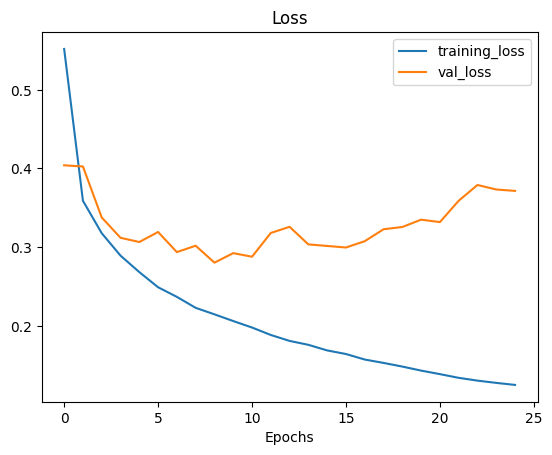

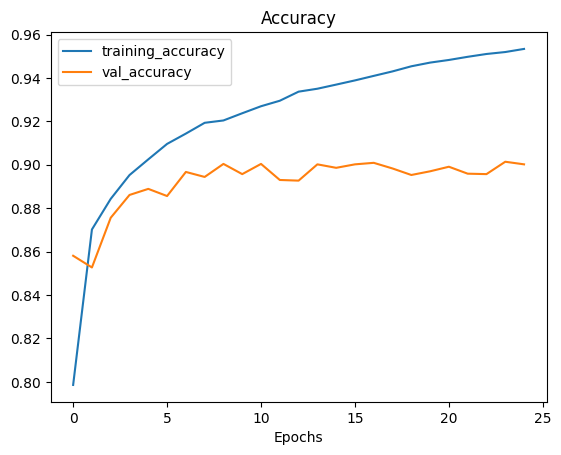

In [19]:
# Getting loss curves
plot_loss_curves(model_2_history)

Distance between validation and training increases, so slight overfitting of data.

## Pedictions on model 2

In [20]:
# Make predictions
y_probs = model_2.predict(test_data)

# Converting all predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [21]:
# Function for the confusion matrix 
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

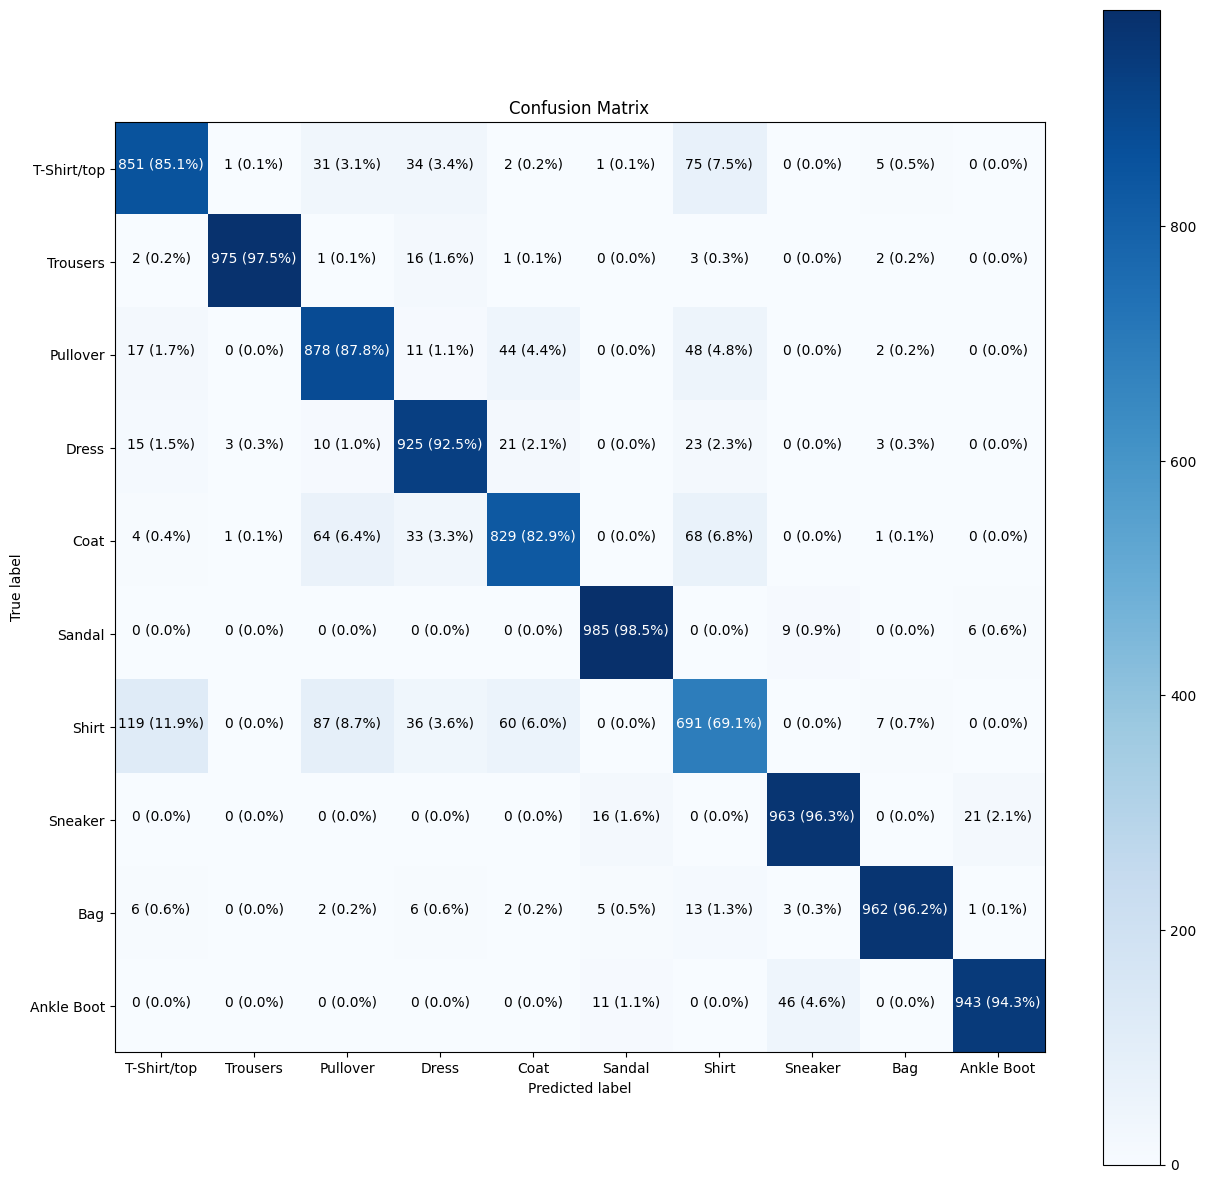

In [22]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

Model gets confused over clothes which have similar features, like Shirt and T-shirt/top

## Evaluating F1-Score

In [23]:
from sklearn.metrics import classification_report

# Get a dictionary of the classification report
classification_report_dict = classification_report(test_labels, y_preds, output_dict=True)
classification_report_dict

{'0': {'precision': 0.8392504930966469,
  'recall': 0.851,
  'f1-score': 0.8450844091360477,
  'support': 1000},
 '1': {'precision': 0.9948979591836735,
  'recall': 0.975,
  'f1-score': 0.984848484848485,
  'support': 1000},
 '2': {'precision': 0.8182665424044734,
  'recall': 0.878,
  'f1-score': 0.8470815243608297,
  'support': 1000},
 '3': {'precision': 0.8718190386427899,
  'recall': 0.925,
  'f1-score': 0.8976225133430373,
  'support': 1000},
 '4': {'precision': 0.8644421272158499,
  'recall': 0.829,
  'f1-score': 0.8463501786625829,
  'support': 1000},
 '5': {'precision': 0.9675834970530451,
  'recall': 0.985,
  'f1-score': 0.9762140733399405,
  'support': 1000},
 '6': {'precision': 0.750271444082519,
  'recall': 0.691,
  'f1-score': 0.7194169703279542,
  'support': 1000},
 '7': {'precision': 0.9431929480901078,
  'recall': 0.963,
  'f1-score': 0.9529935675408214,
  'support': 1000},
 '8': {'precision': 0.9796334012219959,
  'recall': 0.962,
  'f1-score': 0.9707366296670029,
  'su

In [24]:
# Create empty dictionary
class_f1_scores = {}
# Loop through classification report items
for k, v in classification_report_dict.items():
  if k == "accuracy": # stop once we get to accuracy key
    break
  else:
    # Append class names and f1-scores to new dictionary
    class_f1_scores[class_names[int(k)]] = v["f1-score"]
class_f1_scores

{'T-Shirt/top': 0.8450844091360477,
 'Trousers': 0.984848484848485,
 'Pullover': 0.8470815243608297,
 'Dress': 0.8976225133430373,
 'Coat': 0.8463501786625829,
 'Sandal': 0.9762140733399405,
 'Shirt': 0.7194169703279542,
 'Sneaker': 0.9529935675408214,
 'Bag': 0.9707366296670029,
 'Ankle Boot': 0.9568746829020801}

In [25]:
# Turn f1-scores into dataframe for visualization
import pandas as pd
f1_scores = pd.DataFrame({"class_name": list(class_f1_scores.keys()),
                          "f1-score": list(class_f1_scores.values())}).sort_values("f1-score", ascending=False)
f1_scores.head()

,class_name,f1-score
1,Trousers,0.984848
5,Sandal,0.976214
8,Bag,0.970737
9,Ankle Boot,0.956875
7,Sneaker,0.952994


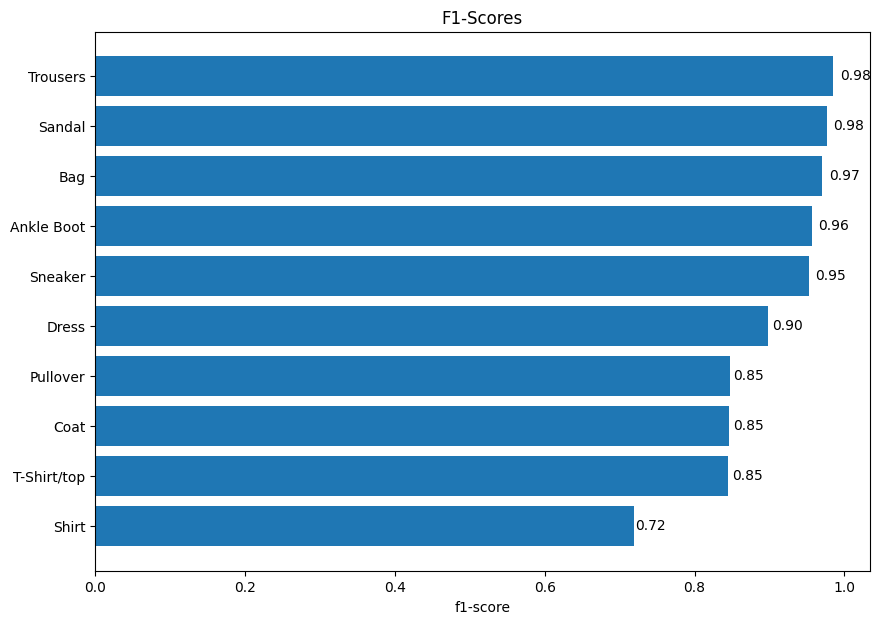

In [26]:
# Visualising
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 7))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores")
ax.invert_yaxis(); # reverse the order

def autolabel(rects): # Modified version of: https://matplotlib.org/examples/api/barchart_demo.html
  """
  Attach a text label above each bar displaying its height (it's value).
  """
  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.5,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

Worst performing class is Shirt

# Saving the model

In [27]:
model_2.save('model_2')